In [2]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tqdm import tqdm


print("Imported successfully")

Imported successfully


In [3]:
# Fonction de chargement du dataset
def load_dataset(dataset_path):
    dataset = pd.read_csv(dataset_path, sep=";")
    return dataset

# Appel de la fonction
dataset_path = "C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/dataset/text/text.csv"
dataset = load_dataset(dataset_path)

print("Loaded dataset successfully")

Loaded dataset successfully


In [4]:
# Fonction pour obtenir les mappings de labels avec tqdm
def get_label_mappings(dataset):
    labels = [label for label in tqdm(dataset.columns, desc="Extraction des labels") if label != 'sentence']
    id2label = {i: label for i, label in enumerate(labels)}
    label2id = {v: k for k, v in id2label.items()}
    return labels, id2label, label2id

# Appel de la fonction
labels, id2label, label2id = get_label_mappings(dataset)

Extraction des labels: 100%|██████████| 5/5 [00:00<?, ?it/s]


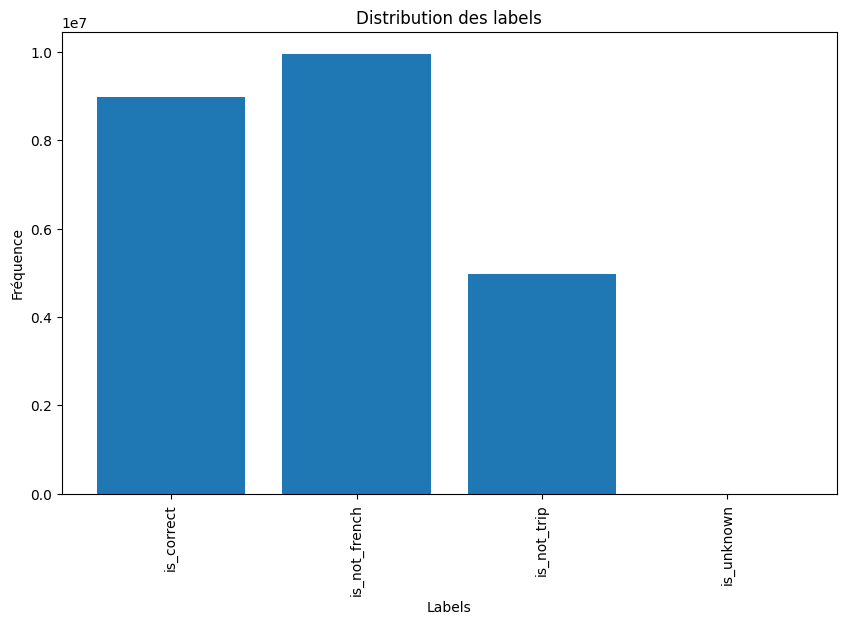

In [5]:
# Fonction de visualisation de la distribution des labels
def plot_label_distribution(labels, dataset):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, [sum(dataset[label]) for label in labels])
    plt.title("Distribution des labels")
    plt.xlabel("Labels")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=90)
    plt.show()

# Appel de la fonction
plot_label_distribution(labels, dataset)

In [6]:
# Fonction de séparation des données en train, validation et test avec tqdm
def split_data(dataset, labels, frac=0.5, test_size=0.2, random_state=42):
    tqdm_desc = "Séparation des données"
    with tqdm(total=4, desc=tqdm_desc) as pbar:  # 4 étapes dans ce processus
        X = dataset['sentence']
        y = dataset[labels]
        pbar.update(1)  # Étape 1 : Extraction des colonnes

        X = X.sample(frac=frac, random_state=random_state)
        y = y.loc[X.index]
        pbar.update(1)  # Étape 2 : Échantillonnage aléatoire

        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)
        pbar.update(1)  # Étape 3 : Première séparation train / temp

        X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)
        pbar.update(1)  # Étape 4 : Deuxième séparation temp / validation et test
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Appel de la fonction
X_train, X_val, X_test, y_train, y_val, y_test = split_data(dataset, labels)


Séparation des données: 100%|██████████| 4/4 [00:30<00:00,  7.71s/it]


In [7]:
# Fonction pour créer et entraîner le modèle avec tqdm
def train_model(X_train, y_train):
    steps = ['Initialisation du pipeline', 'Vectorisation des données', 'Entraînement du modèle']
    pipeline = None

    with tqdm(total=len(steps), desc="Entraînement du modèle") as pbar:
        # Étape 1 : Initialisation du pipeline
        pipeline = Pipeline([
            ('vectorizer', CountVectorizer(min_df=100)),
            ('classifier', OneVsRestClassifier(MultinomialNB()))
        ])
        pbar.update(1)  # Met à jour la barre après la première étape

        # Étape 2 : Vectorisation
        pipeline.named_steps['vectorizer'].fit(X_train)
        pbar.update(1)  # Met à jour la barre après la deuxième étape

        # Étape 3 : Entraînement
        pipeline.fit(X_train, y_train)
        pbar.update(1)  # Met à jour la barre après l'entraînement

    return pipeline

# Appel de la fonction
print("Entraînement du modèle...")
pipeline = train_model(X_train, y_train)
print("\nEntraînement terminé...")

Entraînement du modèle...


Entraînement du modèle:  67%|██████▋   | 2/3 [03:02<01:31, 91.15s/it]C:\Users\vikne\anaconda3\Lib\site-packages\sklearn\multiclass.py:87: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
Entraînement du modèle: 100%|██████████| 3/3 [06:42<00:00, 134.04s/it]


Entraînement terminé...


In [8]:
# Sauvegarde du modèle avec tqdm
model_path = 'C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/models/text_classification/bow_naive_bayes.joblib'
with tqdm(total=1, desc="Sauvegarde du modèle") as pbar:
    joblib.dump(pipeline, model_path)
    pbar.update(1)

print(f"Modèle sauvegardé dans '{model_path}'")

Sauvegarde du modèle: 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]

Modèle sauvegardé dans 'C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/models/text_classification/bow_naive_bayes.joblib'



Rapport de classification :


C:\Users\vikne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikne\anaconda3\Lib\site-package

               precision    recall  f1-score   support

   is_correct       0.95      0.96      0.96    449874
is_not_french       1.00      1.00      1.00    496631
  is_not_trip       0.95      1.00      0.97    249652
   is_unknown       0.00      0.00      0.00         0

    micro avg       0.97      0.98      0.98   1196157
    macro avg       0.73      0.74      0.73   1196157
 weighted avg       0.97      0.98      0.98   1196157
  samples avg       0.81      0.81      0.81   1196157



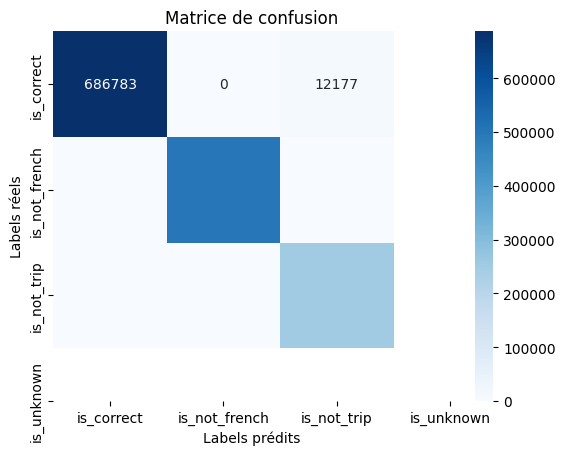

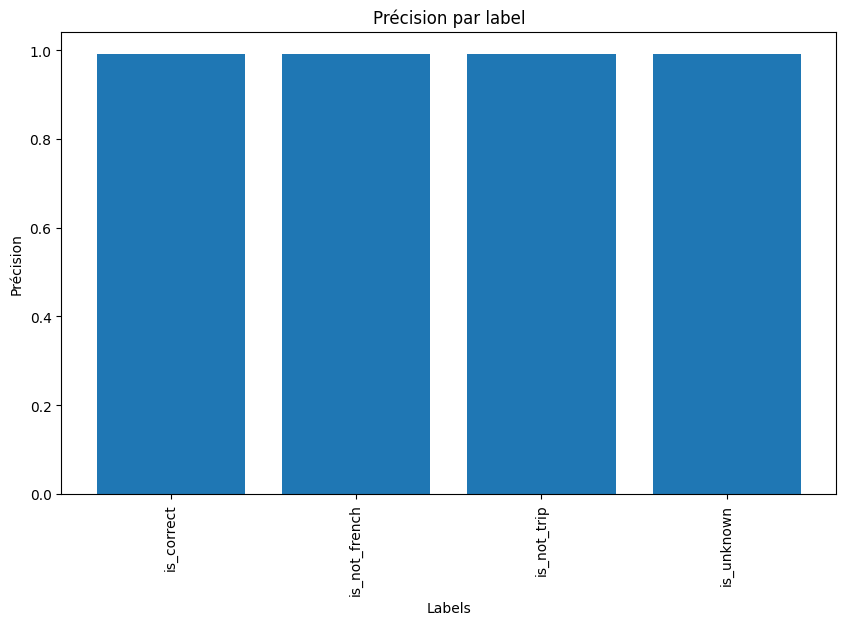

C:\Users\vikne\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


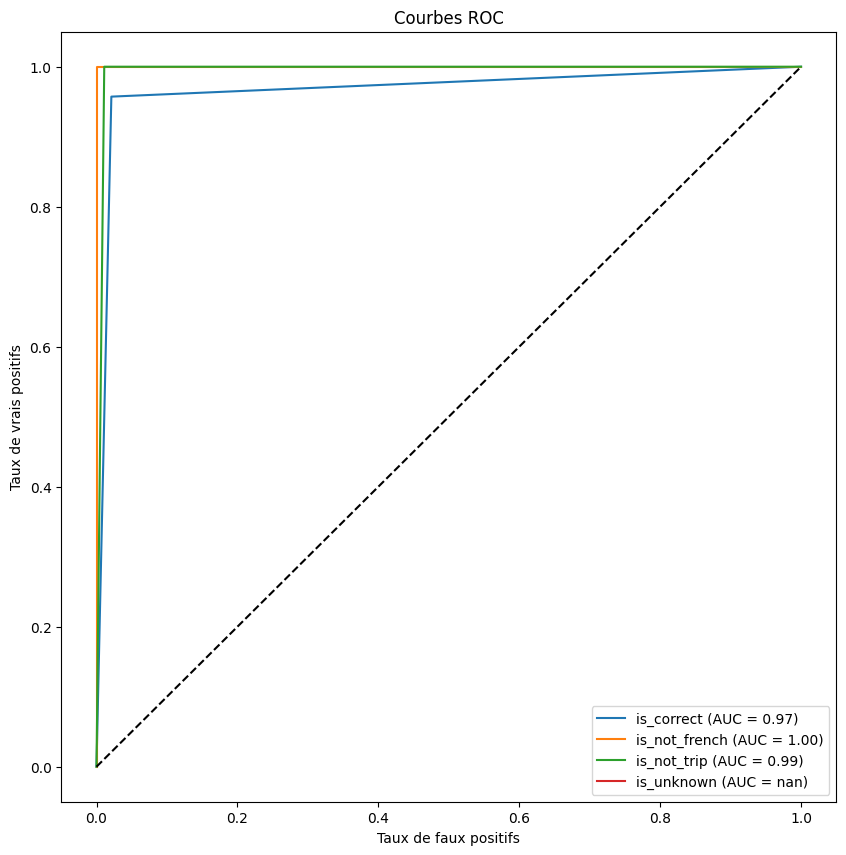

In [9]:
# Fonction pour tracer la précision par label
def plot_precision_by_label(y_test, y_pred, labels):
    accuracies = (y_test.values.argmax(axis=1) == y_pred.argmax(axis=1)).mean(axis=0)
    plt.figure(figsize=(10, 6))
    plt.bar(labels, accuracies)
    plt.title('Précision par label')
    plt.xlabel('Labels')
    plt.ylabel('Précision')
    plt.xticks(rotation=90)
    plt.show()

# Fonction pour tracer les courbes ROC
def plot_roc_curve(y_test, y_pred, labels):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(labels)):
        fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 10))
    for i in range(len(labels)):
        plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbes ROC')
    plt.legend()
    plt.show()
    
# Fonction pour évaluer le modèle
def evaluate_model(pipeline, X_test, y_test, labels):
    y_pred = pipeline.predict(X_test)

    # Rapport de classification
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred, target_names=labels))

    # Matrice de confusion
    cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.title('Matrice de confusion')
    plt.xlabel('Labels prédits')
    plt.ylabel('Labels réels')
    plt.show()

    # Précision par label
    plot_precision_by_label(y_test, y_pred, labels)

    # Courbes ROC
    plot_roc_curve(y_test, y_pred, labels)

# Appel de la fonction
evaluate_model(pipeline, X_test, y_test, labels)

In [10]:
# Fonction pour prédire sur des exemples spécifiques
def predict_new_texts(pipeline, texts, id2label):
    predicted_labels = pipeline.predict(texts)
    predicted_proba = pipeline.predict_proba(texts)

    print("\nPrédictions sur de nouveaux textes :")
    for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
        print(f"* {text}")
        for i, score in enumerate(prob):
            print(f" - {id2label[i]} => {round(score * 100, 1)}%")
        print()

# Appel de la fonction pour prédire
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]
predict_new_texts(pipeline, texts, id2label)


Prédictions sur de nouveaux textes :
* Je veux aller au cinéma
 - is_correct => 0.0%
 - is_not_french => 0.0%
 - is_not_trip => 0.0%
 - is_unknown => 0.0%

* Je veux aller du cinéma au restaurant
 - is_correct => 0.0%
 - is_not_french => 0.0%
 - is_not_trip => 0.0%
 - is_unknown => 0.0%

* I'd like to go from the cinema to the restaurant
 - is_correct => 54.8%
 - is_not_french => 99.8%
 - is_not_trip => 0.0%
 - is_unknown => 0.0%

* I'd like to Paris from Nanterre
 - is_correct => 76.2%
 - is_not_french => 59.1%
 - is_not_trip => 0.0%
 - is_unknown => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - is_correct => 31.1%
 - is_not_french => 34.5%
 - is_not_trip => 17.2%
 - is_unknown => 0.0%

* J'aimerais me rendre de Nanterre à Paris
 - is_correct => 100.0%
 - is_not_french => 0.0%
 - is_not_trip => 0.0%
 - is_unknown => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - is_correct => 0.0%
 - is_not_french => 0.0%
 - is_not_trip => 0.0%
 - is_unknown => 0.0%

* Nantes à Toulouse
 - is_